# TP 1 - Équation de la chaleur
## Theta-schéma

On résout numériquement l'équation de la chaleur sur $\Omega:=]-L,L[$ avec conditions aux limites de Dirichlet

$$ \frac{\partial u}{\partial t}(x,t)-\frac{\partial^2 u}{\partial x^2}(x,t) = 0,\quad x \in \Omega,\quad t \gt 0,\\
u(-L,t)=u(L,t)=0,\quad t > 0,\\
u(x,0)=u_0(x),\quad x \in \Omega, $$

et theta-schéma :

$$ \frac{u_j^{n+1}-u_j^n}{\Delta t} -
   \theta \frac{u_{j+1}^n-2u_j^n+u_{j-1}^n}{\Delta x^2} -
(1-\theta)\frac{u_{j+1}^{n+1}-2u_j^{n+1}+u_{j-1}^{n+1}}{\Delta x^2} = 0. $$ 

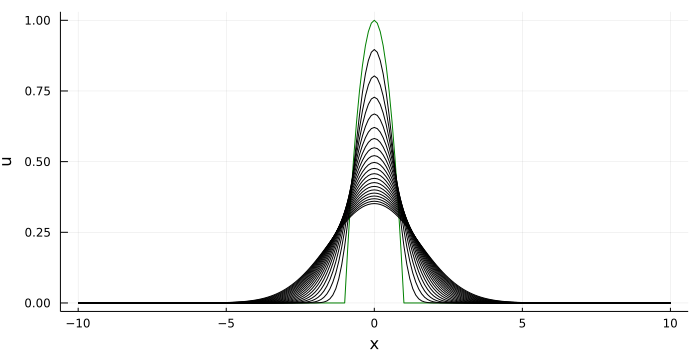

In [ ]:
using LinearAlgebra, Plots

# Parameters
L = 10                                 # domain half size
Nx = 200                               # grid size (space)
Δx = 2*L/Nx                            # step size (space)
σ = 0.52                               # CFL
Δt = σ * Δx^2                          # step size (time)
θ = 0.4                                # scheme parameter
Nt = 200                               # grid size (time)
x = range(-L, L, length=Nx+1)          # grid (space)
u0 = max.(0, 1 .- x.^2)                # initial condition

# Explicit scheme
u = u0
u_plot = plot(x, u, xlabel="x", ylabel="u", color=:green, legend=false)

A = Tridiagonal(-(1-θ)*σ*ones(Nx), 1 .+ 2*(1-θ)*σ*ones(Nx+1), -(1-θ)*σ*ones(Nx))
B = Tridiagonal(θ*σ*ones(Nx), 1 .- 2*θ*σ*ones(Nx+1), θ*σ*ones(Nx))

for n = 1:Nt
    u = A\(B*u)
    if mod(n, Nt/20) == 0
        plot!(u_plot, x, u, xlabel="x", ylabel="u", color=:black, legend=false)
    end
end
display(plot(u_plot, size=(700, 350)))

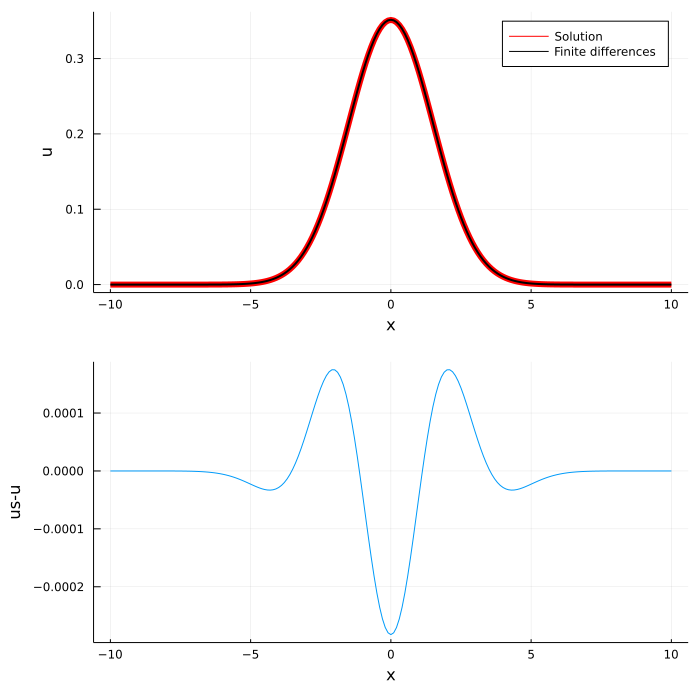

Δx: 0.1	 Δt:0.0052000000000000015	 max error: 0.00028260530624635294


In [10]:
# Comparison with exact solution (convolution with Gaussian kernel)
us = zeros(Nx+1)
ker = exp.( -((0:Nx)*Δx).^2 / (4*Nt*Δt) )
kmax = findall(x -> x < 1e-14, ker)
kmax = length(kmax) > 0 ? kmax[1] : error("Increase Nx")
for j = 1:(Nx+1)
    jmin = max(1, j-kmax)
    jmax = min(Nx+1, j+kmax)
    us[j] = Δx * sum( u0[jmin:jmax].*ker[1 .+ abs.(j.-(jmin:jmax))] ) / sqrt(4*π*Nt*Δt)
end

err = us-u
us_plot = plot(x, us, xlabel="x", ylabel="us", color=:red, label="Solution", lw=6)
plot!(us_plot, x, u, xlabel="x", ylabel="u", color=:black, label="Finite differences", lw=2)
err_plot = plot(x, err, xlabel="x", ylabel="us-u", legend=false)
display(plot(us_plot, err_plot, layout=(2, 1), size=(700, 700)))
println("Δx: ", Δx, "\t Δt:", Δt, "\t max error: ", maximum(abs.(err)))